In [2]:
# Read dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Scale data
from sklearn.preprocessing import StandardScaler
# Train test split
from sklearn.model_selection import train_test_split
# Build model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Evaluation model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
# Feature extraction
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from datetime import datetime
# Imbalanced data
from imblearn.combine import SMOTEENN

In [3]:
pd.options.mode.chained_assignment = None

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Đọc dữ liệu

In [5]:
data = pd.read_csv('bank-additional-full.csv', sep=';')

In [6]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Tiền xử lí dữ liệu

## Check null

In [7]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Check duplicate

In [8]:
data.duplicated().sum()

12

In [9]:
data.drop_duplicates(inplace=True)

## Đổi 999 trong cột 'pday' thành 0

In [10]:
data['pdays'] = data['pdays'].replace(999,0)

## Thay yes thành 1 và no thành 0 trong cột 'y' 

In [11]:
data = data.replace({'y': {'no': 0, 'yes': 1}})

## Mã hóa các cột định danh

In [12]:
data = pd.get_dummies(data, columns=["job", "marital", "education", "default", "housing", "loan",
"contact", "month", "day_of_week", "poutcome"], drop_first=True)

## Cân bằng dữ liệu

In [13]:
X_res = data.drop(columns='y')
Y_res = data['y']

In [14]:
Y_res.value_counts()

0    36537
1     4639
Name: y, dtype: int64

In [15]:
sme = SMOTEENN(random_state=42)

X_sme, Y_sme = sme.fit_resample(X_res, Y_res)

In [16]:
data = pd.concat([X_sme, Y_sme], axis=1)
data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y
0,56,261,1,0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64303,48,1985,1,0,0,0.130689,93.352639,-40.923452,4.287953,5194.877245,...,0,0,0,0,0,0,0,1,0,1
64304,34,371,1,0,0,-3.400000,92.428382,-27.046012,0.742417,5017.500000,...,0,0,0,0,0,0,0,0,0,1
64305,37,636,2,0,0,1.400000,93.918000,-42.700000,4.959953,5228.100000,...,0,0,0,0,0,0,0,1,0,1
64306,24,724,2,0,0,1.400000,93.918000,-42.700000,4.967199,5228.100000,...,0,0,0,0,1,0,0,1,0,1


1    34693
0    29615
Name: y, dtype: int64


<AxesSubplot:>

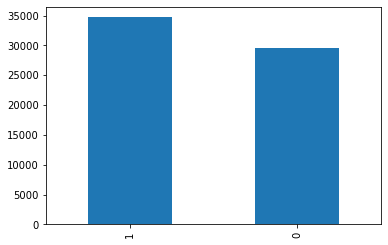

In [17]:
print(data['y'].value_counts())
data['y'].value_counts().plot(kind='bar')

## Chuẩn hóa dữ liệu theo Z-score

In [18]:
scaler = StandardScaler()
data_sc = data.copy().drop(columns='y')
data_y = data['y']
data_scales = scaler.fit_transform(data_sc)
data = pd.DataFrame(data_scales, index=data_sc.index, columns=data_sc.columns)
data['y'] = data_y

In [19]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y
0,1.384444,-0.327412,-0.512706,-0.312227,-0.394103,0.893604,0.787151,0.701138,0.970571,0.617444,...,-0.265916,-0.144146,-0.140161,2.673669,-0.395067,-0.377252,-0.382131,0.630294,-0.241864,0
1,1.471200,-0.640701,-0.512706,-0.312227,-0.394103,0.893604,0.787151,0.701138,0.970571,0.617444,...,-0.265916,-0.144146,-0.140161,2.673669,-0.395067,-0.377252,-0.382131,0.630294,-0.241864,0
2,-0.263918,-0.425315,-0.512706,-0.312227,-0.394103,0.893604,0.787151,0.701138,0.970571,0.617444,...,-0.265916,-0.144146,-0.140161,2.673669,-0.395067,-0.377252,-0.382131,0.630294,-0.241864,0
3,-0.003651,-0.635106,-0.512706,-0.312227,-0.394103,0.893604,0.787151,0.701138,0.970571,0.617444,...,-0.265916,-0.144146,-0.140161,2.673669,-0.395067,-0.377252,-0.382131,0.630294,-0.241864,0
4,1.384444,-0.198740,-0.512706,-0.312227,-0.394103,0.893604,0.787151,0.701138,0.970571,0.617444,...,-0.265916,-0.144146,-0.140161,2.673669,-0.395067,-0.377252,-0.382131,0.630294,-0.241864,0


# Trích chọn đặc trưng

In [20]:
X_rfe = data.drop(['duration', 'y'], axis=1)
Y_rfe = data['y']

In [21]:
feature_selection = data.columns
X_train, X_test, y_train, y_test = train_test_split(X_rfe, Y_rfe,test_size=0.2)
DT = DecisionTreeClassifier()
RFE_DT = RFE(DT)
RFE_DT.fit(X_train, y_train)
col_DT = X_train.columns[RFE_DT.support_]

LG = LogisticRegression()
RFE_LG = RFE(LG)
RFE_LG.fit(X_train, y_train)
col_LG = X_train.columns[RFE_LG.support_]

RF = RandomForestClassifier()
RFE_RF= RFE(RF)
RFE_RF.fit(X_train, y_train)
col_RF = X_train.columns[RFE_RF.support_]

SVM = SVC(kernel="linear", max_iter=1000)
RFE_SVM = RFE(SVM)
RFE_SVM.fit(X_train, y_train)
col_SVM = X_train.columns[RFE_SVM.support_]

feature_selection = list(set.intersection(*map(set, [col_DT, col_LG, col_RF, col_SVM])))

C:\Users\Nguyen Quang Tu\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Nguyen Quang Tu\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Nguyen Quang Tu\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Nguyen Quang Tu\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Nguyen Quang Tu\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: Conve

In [22]:
feature_selection

['marital_single',
 'education_professional.course',
 'emp.var.rate',
 'day_of_week_mon',
 'previous',
 'contact_telephone',
 'day_of_week_wed',
 'month_may',
 'poutcome_nonexistent',
 'euribor3m',
 'education_basic.9y',
 'default_unknown',
 'day_of_week_thu']

# Xây dựng mô hình

In [25]:
list_model = []

# Chọn biến X và Y

In [23]:
X = data[feature_selection]
Y = data['y']

# Chia tập dữ liệu thành 2 tập train(80%) và test(20%)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## KNN

In [26]:
error = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
k_toi_uu = error.index(min(error)) + 1
print("Minimum error:-",min(error),"at K =", k_toi_uu)

Minimum error:- 0.08218006530866118 at K = 5


In [27]:
knn = KNeighborsClassifier (n_neighbors = k_toi_uu)
list_model.append(knn)

## Hồi quy Logistic

In [28]:
lr = LogisticRegression()
list_model.append(lr)

## Random Forest

In [29]:
rf = RandomForestClassifier()
list_model.append(rf)

## Naive Bayes

In [30]:
nb = GaussianNB()
list_model.append(nb)

## Neural Network

In [31]:
mlp = MLPClassifier()
list_model.append(mlp)

## SVC

In [32]:
svc = SVC(kernel="linear")
list_model.append(svc)

# Đánh giá mô hình

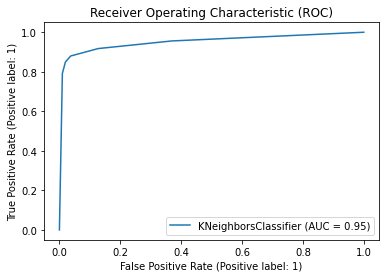

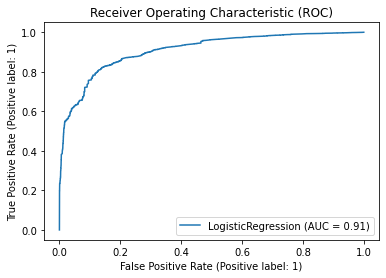

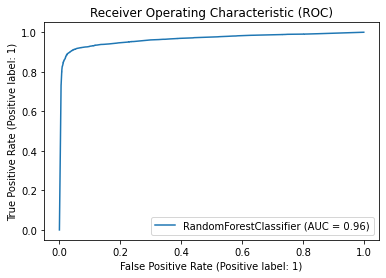

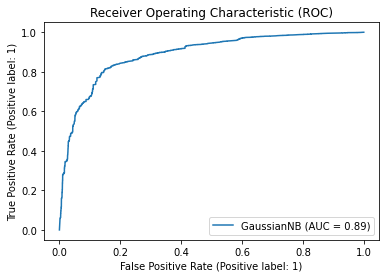

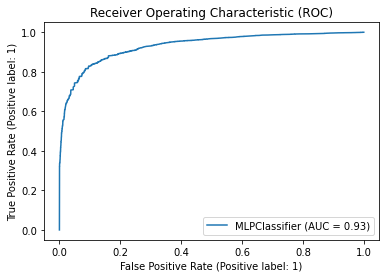

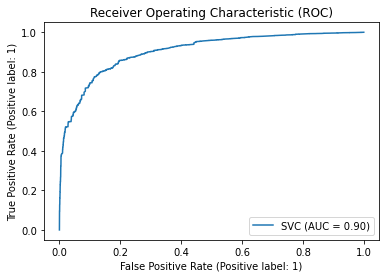

In [33]:
model_eval = []
model_name = ['KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', "Neural Network", "SVC"]
i = 0

for model in list_model:
    start_time = datetime.now()
    
    eval_dict = {}
    eval_dict['Model name'] = model_name[i]
    i += 1
    
    # Xây dựng mô hình
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Model accuracy
    acc_score = accuracy_score(y_test, y_pred)
    eval_dict['Accuracy (%)'] = round(acc_score, 4)*100
    
    # Model precision
    precision = precision_score(y_test, y_pred)
    eval_dict['Precision'] = round(precision, 2)
    
    # Modell recall
    recall = recall_score(y_test, y_pred)
    eval_dict['Recall'] = round(recall, 2)

    # Model F1 score
    f1_score = metrics.f1_score(y_test, y_pred)
    eval_dict['F1-score'] = round(f1_score, 2)
    
    # Model ROC and AUC
    RocCurveDisplay.from_estimator(model, x_test, y_test)
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.show()
    
    # Running time
    end_time = datetime.now()
    eval_dict['Running time'] = '{}'.format(end_time - start_time)
    
    model_eval.append(eval_dict)

model_eval = pd.DataFrame(model_eval)

In [34]:
model_eval.sort_values('Accuracy (%)', ascending=False)

,Model name,Accuracy (%),Precision,Recall,F1-score,Running time
2,Random Forest,92.87,0.98,0.89,0.93,0:00:07.579594
0,KNN,91.78,0.97,0.88,0.92,0:00:20.452834
4,Neural Network,86.09,0.91,0.83,0.87,0:01:01.350964
1,Logistic Regression,83.04,0.83,0.86,0.85,0:00:00.435305
5,SVC,83.03,0.84,0.85,0.85,0:04:00.560216
3,Naive Bayes,82.79,0.85,0.83,0.84,0:00:00.369362


# Sử dụng K fold cross validation

In [35]:
KF = KFold(n_splits = 10, shuffle=True, random_state=1)

In [36]:
model_eval_k = []
i = 0

scoring = ['accuracy', 'precision', 'recall', 'f1']

for model in list_model:
    start_time = datetime.now()
    
    eval_dict = {}
    eval_dict['Model name (kFold)'] = model_name[i]
    i += 1
    
    # Xây dựng mô hình
    results = cross_validate(estimator=model, X=X, y=Y, cv=KF, scoring=scoring)
    
    # Model accuracy
    eval_dict['Accuracy (%)'] = round(results['test_accuracy'].mean(), 4)*100
    
    # Model precision
    eval_dict['Precision'] = round(results['test_precision'].mean(), 2)
    
    # Modell recall
    eval_dict['Recall'] = round(results['test_recall'].mean(), 2)

    # Model F1 score
    eval_dict['F1-score'] = round(results['test_f1'].mean(), 2)
    
    # Running time    
    end_time = datetime.now()
    eval_dict['Running time'] = '{}'.format(end_time - start_time)
    
    model_eval_k.append(eval_dict)
    
model_eval_k = pd.DataFrame(model_eval_k)

In [37]:
model_eval_k.sort_values('Accuracy (%)', ascending=False)

,Model name (kFold),Accuracy (%),Precision,Recall,F1-score,Running time
2,Random Forest,93.04,0.97,0.90,0.93,0:00:46.820851
0,KNN,91.78,0.98,0.87,0.92,0:00:33.171073
4,Neural Network,85.89,0.89,0.84,0.87,0:07:57.673765
5,SVC,83.25,0.83,0.86,0.85,0:28:11.029780
1,Logistic Regression,83.20,0.83,0.86,0.85,0:00:01.177424
3,Naive Bayes,82.88,0.85,0.84,0.84,0:00:00.505614


## So sánh train_test_split và K fold

In [39]:
difference = pd.DataFrame(model_name, columns=["Model name"])
difference

,Model name
0,KNN
1,Logistic Regression
2,Random Forest
3,Naive Bayes
4,Neural Network
5,SVC


In [40]:
difference["Dif_Accuracy"] = model_eval_k["Accuracy (%)"] - model_eval["Accuracy (%)"]
difference["Dif_Precision"] = model_eval_k["Precision"] - model_eval["Precision"]
difference["Dif_Recall"] = model_eval_k["Recall"] - model_eval["Recall"]
difference["Dif_F1-score"] = model_eval_k["F1-score"] - model_eval["F1-score"]

In [44]:
def format_value(val):
    condition = (val > 0) 
    font_color = 'green' if condition else 'black'
    font_weight = 'bold' if condition else 'normal'
    return 'color: {}; font-weight: {}'.format(font_color, font_weight)

In [45]:
difference.style.applymap(format_value, subset=["Dif_Accuracy", "Dif_Precision", "Dif_Recall", "Dif_F1-score"])

,Model name,Dif_Accuracy,Dif_Precision,Dif_Recall,Dif_F1-score
0,KNN,0.000000,0.010000,-0.010000,0.000000
1,Logistic Regression,0.160000,0.000000,0.000000,0.000000
2,Random Forest,0.170000,-0.010000,0.010000,0.000000
3,Naive Bayes,0.090000,0.000000,0.010000,0.000000
4,Neural Network,-0.200000,-0.020000,0.010000,0.000000
5,SVC,0.220000,-0.010000,0.010000,0.000000


In [42]:
difference.style.applymap(lambda x: "background-color: red" if x<0 else "background-color: white",
subset=["Dif_Accuracy", "Dif_Precision", "Dif_Recall", "Dif_F1-score"])

,Model name,Dif_Accuracy,Dif_Precision,Dif_Recall,Dif_F1-score
0,KNN,0.000000,0.010000,-0.010000,0.000000
1,Logistic Regression,0.160000,0.000000,0.000000,0.000000
2,Random Forest,0.170000,-0.010000,0.010000,0.000000
3,Naive Bayes,0.090000,0.000000,0.010000,0.000000
4,Neural Network,-0.200000,-0.020000,0.010000,0.000000
5,SVC,0.220000,-0.010000,0.010000,0.000000


In [43]:
difference[difference.columns[1:5]]

,Dif_Accuracy,Dif_Precision,Dif_Recall,Dif_F1-score
0,0.00,0.01,-0.01,0.0
1,0.16,0.00,0.00,0.0
2,0.17,-0.01,0.01,0.0
3,0.09,0.00,0.01,0.0
4,-0.20,-0.02,0.01,0.0
5,0.22,-0.01,0.01,0.0
